In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from zipfile import ZipFile
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Download from github and extract
#!wget -N https://github.com/joechoong33/LC_loan/zipball/master
#!unzip -o master
#!unzip -o joechoong33-LC_loan-70a9ba3/DS-02-lendingclub-loan-data-2017q1.zip

In [8]:
# There are 96,781 cases
df = pd.read_csv('lpetrocelli-lendingclub-loan-data-2017-q-1/LoanStats_2017Q1 2.csv',skiprows = 1)
df.shape

(96781, 122)

In [9]:
df_loan = df[:-2]
df_loan.tail(2)
df['int_rate'] = df['int_rate'].str.replace('%','')
df['int_rate'] = pd.to_numeric(df['int_rate'],errors='coerce')

In [10]:
# Many columns has mssing Missing values
missing_values = df.isnull().mean().sort_values(ascending=False)
missing_values.head(10)

desc                                   1.000000
member_id                              1.000000
url                                    1.000000
id                                     0.999979
sec_app_mths_since_last_major_derog    0.996322
sec_app_revol_util                     0.989471
sec_app_chargeoff_within_12_mths       0.989409
sec_app_open_il_6m                     0.989409
sec_app_collections_12_mths_ex_med     0.989409
sec_app_open_acc                       0.989409
dtype: float64

Text(0, 0.5, 'Feature count')

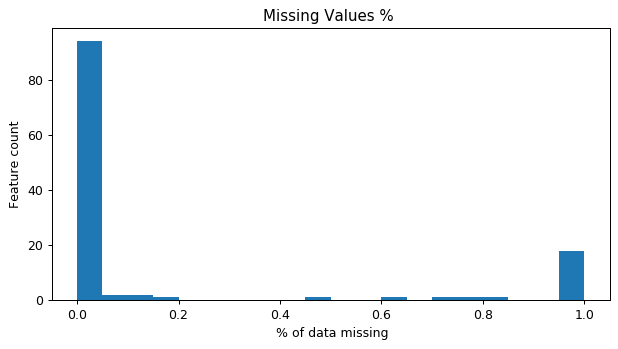

In [11]:
plt.figure(figsize=(8,4), dpi=90)
missing_values.plot.hist(bins=20)
plt.title('Missing Values % ')
plt.xlabel(' % of data missing')
plt.ylabel('Feature count')

In [12]:
# Loans statistic and loan status
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Current,78897.0,14903.071410,9368.742178,1000.0,8000.00,12000.0,20000.00,40000.0
Fully Paid,2251.0,13765.581964,9683.266473,1000.0,6000.00,12000.0,20000.00,40000.0
In Grace Period,330.0,14927.651515,9584.724114,1000.0,7231.25,12000.0,20000.00,40000.0
Issued,15071.0,14777.123283,9482.242697,1000.0,7225.00,12000.0,20000.00,40000.0
Late (16-30 days),104.0,15023.317308,9399.333317,1000.0,7731.25,14000.0,20250.00,36000.0
Late (31-120 days),126.0,15721.825397,9479.270006,1000.0,7643.75,14850.0,23681.25,38000.0


In [13]:
df['int_rate'].describe()

count    96779.000000
mean        13.370696
std          5.069448
min          5.320000
25%         10.490000
50%         12.740000
75%         15.990000
max         30.990000
Name: int_rate, dtype: float64

In [14]:
# Higher int rate lead to higher risk
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Current,78897.0,13.358483,5.037866,5.32,10.49,12.74,15.99,30.99
Fully Paid,2251.0,14.775300,5.773307,5.32,11.44,13.49,16.99,30.99
In Grace Period,330.0,15.423485,5.374601,5.32,11.49,13.99,17.99,30.99
Issued,15071.0,13.113013,5.018798,5.32,10.49,12.74,15.99,30.99
Late (16-30 days),104.0,17.130865,6.465359,6.99,11.49,15.99,22.74,30.89
Late (31-120 days),126.0,18.266667,6.332149,5.32,13.49,16.99,23.99,30.89


In [15]:
# Median show higher installment amount lead to higher risk
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Current,78897.0,452.340611,282.798948,30.12,247.1100,373.240,604.010,1715.42
Fully Paid,2251.0,433.440178,307.634803,31.11,197.8300,351.530,602.435,1569.11
In Grace Period,330.0,470.209485,309.801164,33.94,242.6300,371.975,628.950,1425.92
Issued,15071.0,444.766969,282.217272,30.12,237.7400,367.410,592.790,1542.98
Late (16-30 days),104.0,472.056346,305.532160,32.50,269.7825,395.230,661.480,1250.04
Late (31-120 days),126.0,515.315873,311.047158,37.16,265.6650,471.100,707.605,1367.06


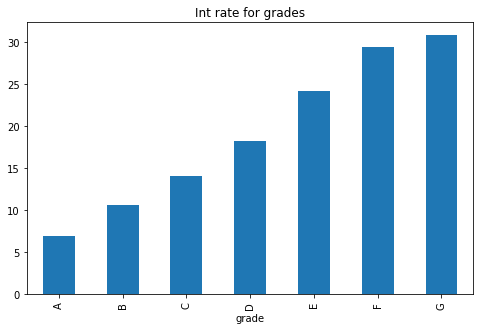

In [16]:
df.groupby('grade')['int_rate'].mean().plot(kind='bar',figsize=(8,5),title='Int rate for grades')

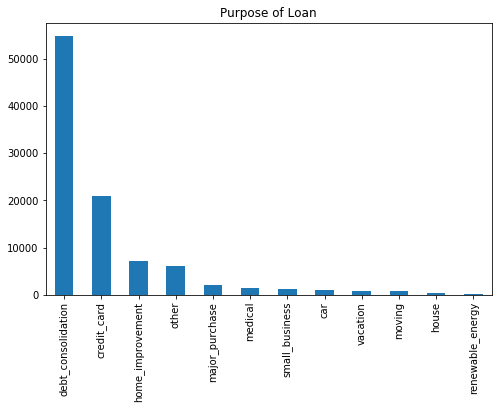

In [17]:
df['purpose'].value_counts().plot(kind='bar',figsize=(8,5),title='Purpose of Loan')

In [18]:
# dti
#"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
#excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Current,78897.0,21.791069,175.210891,-1.00,12.3300,18.070,24.4100,9999.00
Fully Paid,2251.0,16.787188,8.309120,0.13,10.5650,16.120,22.6000,84.03
In Grace Period,330.0,18.298424,8.372141,0.00,12.1150,17.940,23.8775,53.79
Issued,15071.0,24.697783,244.145278,0.00,12.1400,17.880,24.2500,9999.00
Late (16-30 days),104.0,17.587981,8.907457,0.94,10.3525,17.680,24.4850,34.96
Late (31-120 days),126.0,19.454048,10.468229,1.15,11.9300,19.455,25.7600,79.79


In [19]:

df.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Current,78897.0,11.801196,5.735939,1.0,8.0,11.0,15.00,71.0
Fully Paid,2251.0,12.025322,6.064306,1.0,8.0,11.0,15.00,57.0
In Grace Period,330.0,11.387879,5.301359,2.0,8.0,11.0,14.00,39.0
Issued,15071.0,11.777188,5.731007,1.0,8.0,11.0,15.00,72.0
Late (16-30 days),104.0,11.201923,5.722346,2.0,7.0,10.5,14.25,30.0
Late (31-120 days),126.0,12.023810,6.181863,3.0,8.0,11.0,15.00,39.0


In [20]:
df['loan_status'].value_counts()

Current               78897
Issued                15071
Fully Paid             2251
In Grace Period         330
Late (31-120 days)      126
Late (16-30 days)       104
Name: loan_status, dtype: int64

In [21]:
# Map loan status to risk level
df['target']=df['loan_status'].map({'Current': 1,'Issued': 1, 'Fully Paid': 1, 'In Grace Period': 0, 'Late (31-120 days)':0, 'Late (16-30 days)': 0})

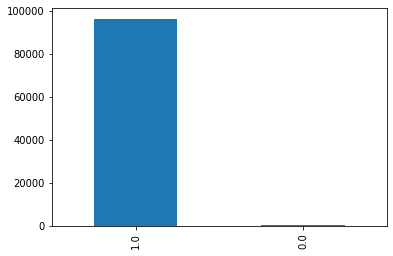

In [22]:
# Huge class imbalance 
df['target'].value_counts().plot(kind='bar')

In [23]:
list1=['int_rate','grade','home_ownership','verification_status','purpose','loan_amnt','emp_length',
       'term','annual_inc','dti','open_acc','tot_coll_amt','emp_title','avg_cur_bal']
df1 =df.loc[:,list1]
df1.shape

(96781, 14)

In [24]:
#Drop features columnns
na1=df1.shape[1]*2/3
print(na1)
df1=df1.dropna(thresh=na1,axis=0)
df1.shape

9.333333333333334


(96779, 14)

In [25]:
#Drop rows
na2=df1.shape[0]*2/3
df1=df1.dropna(thresh=na2,axis=1)
print(df1.shape)

df1['dti']=df1['dti'].fillna(value=df1['dti'].mean())
df1['avg_cur_bal']=df1['avg_cur_bal'].fillna(value=df1['avg_cur_bal'].mean())
df1.select_dtypes(include=['O']).describe()
df1.select_dtypes(include=['float64']).describe()

(96779, 14)


,int_rate,loan_amnt,annual_inc,dti,open_acc,tot_coll_amt,avg_cur_bal
count,96779.000000,96779.000000,9.677900e+04,96779.000000,96779.000000,96779.000000,96779.000000
mean,13.370696,14858.279947,8.276104e+04,22.107865,11.800907,249.040680,13997.574970
std,5.069448,9396.273231,2.149442e+05,185.235747,5.742235,3498.764407,16663.330381
min,5.320000,1000.000000,0.000000e+00,-1.000000,1.000000,0.000000,0.000000
25%,10.490000,7800.000000,4.900000e+04,12.240000,8.000000,0.000000,3214.000000
50%,12.740000,12000.000000,7.000000e+04,17.990000,11.000000,0.000000,7730.000000
75%,15.990000,20000.000000,9.950000e+04,24.350000,15.000000,0.000000,19372.500000
max,30.990000,40000.000000,6.100000e+07,9999.000000,72.000000,932461.000000,710392.000000


In [26]:
#Mapping emp_length, grade ,term
yearDict={"emp_length": {  
        "10+ years": 10,  "9 years": 9,  
        "8 years": 8,  "7 years": 7,  
        "6 years": 6,  "5 years": 5,  
        "4 years": 4,  "3 years": 3,  
        "2 years": 2,  "1 year": 1,  
        "< 1 year": 0,  "n/a": 0}}  
df1=df1.replace(yearDict)  

criDict={"grade": {  
        "A": 1,  "B": 2,  "C": 3,  "D": 4,  "E": 5,  "F": 6,  "G": 7 }}  
df1=df1.replace(criDict)  

termDict={"term": {  
        " 60 months": 60,  " 36 months": 36}}  
df1=df1.replace(termDict)
homeDict={'home_ownership':{'RENT':0,'MORTGAGE':1,'OWN':2,'ANY':0,'NONE':0}}
df1=df1.replace(homeDict) 
df1.head(2)

,int_rate,grade,home_ownership,verification_status,purpose,loan_amnt,emp_length,term,annual_inc,dti,open_acc,tot_coll_amt,emp_title,avg_cur_bal
0,7.49,1,1,Not Verified,other,3600.0,10.0,36,120000.0,18.90,18.0,0.0,Code/Compliance Inspector,2147.0
1,14.99,3,1,Not Verified,other,15000.0,10.0,60,125000.0,17.25,11.0,0.0,Senior Superintendent,8220.0


In [27]:
# Impute with mean
df1["emp_length"]=df1["emp_length"].fillna(value=df1["emp_length"].mean()).astype(int)

In [28]:
df.corr().loc['int_rate'].T

member_id                                   NaN
loan_amnt                              0.136946
funded_amnt                            0.136946
funded_amnt_inv                        0.137106
int_rate                               1.000000
                                         ...   
sec_app_num_rev_accts                 -0.077492
sec_app_chargeoff_within_12_mths      -0.042371
sec_app_collections_12_mths_ex_med     0.103869
sec_app_mths_since_last_major_derog    0.012368
target                                -0.045291
Name: int_rate, Length: 99, dtype: float64

In [29]:
df2 = df1[['int_rate','loan_amnt','term','grade','emp_length','home_ownership']]

In [30]:
# Kmean clustering to improve marketing campaign
import sklearn
from sklearn import preprocessing
min_max_scaler=sklearn.preprocessing.MinMaxScaler()
data=min_max_scaler.fit_transform(df2)
data=pd.DataFrame(data,columns=['int_rate','loan_amnt','term','grade','emp_length','home_ownership'])
#data=pd.DataFrame(data,columns=['int_rate','loan_amnt','term','grade','emp_length'])
data.head()

,int_rate,loan_amnt,term,grade,emp_length,home_ownership
0,0.084534,0.066667,0.0,0.000000,1.0,0.5
1,0.376704,0.358974,1.0,0.333333,1.0,0.5
2,0.236463,0.189744,0.0,0.166667,0.8,0.5
3,0.201402,0.076923,0.0,0.166667,0.2,0.0
4,0.074795,0.128205,0.0,0.000000,0.3,0.0


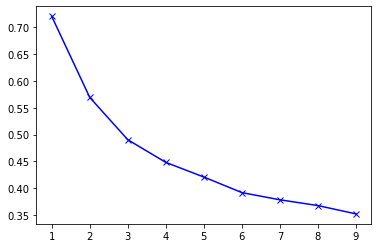

In [31]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist  

aa=[] 
K = range(1, 10) 
for k in range(1,10): 
    kmeans=KMeans(n_clusters=k) 
    kmeans.fit(data) 
    aa.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'),axis=1))/data.shape[0]) 
plt.figure() 
plt.plot(np.array(K), aa, 'bx-') 
plt.show()

In [32]:
k=4
kmodel = KMeans(n_clusters = k, n_jobs = 4) 
kmodel.fit(data) 
r1 = pd.Series(kmodel.labels_).value_counts()
r2 = pd.DataFrame(kmodel.cluster_centers_)
r = pd.concat([r2, r1], axis=1)
r.columns = list(data.columns) + ['Points'] # No of categories
print(r)

   int_rate  loan_amnt          term     grade  emp_length  home_ownership  \
0  0.256670   0.332154 -1.715295e-14  0.225745    0.965817    4.052291e-01   
1  0.438520   0.506843  1.000000e+00  0.406350    0.631224    3.897370e-01   
2  0.302669   0.253279 -1.221245e-14  0.273346    0.312483    3.175238e-14   
3  0.262141   0.315427 -1.293410e-14  0.231476    0.351642    6.247484e-01   

   Points  
0   29650  
1   24369  
2   20896  
3   21864  


In [43]:
kmodel.labels_

array([0, 1, 0, ..., 3, 3, 1], dtype=int32)

IndexError: list index out of range

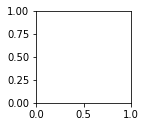

In [44]:
G = len(np.unique(kmodel.labels_)) #Number of labels
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for i in range(G)]
for i, label in enumerate(kmodel.labels_,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue
#Visualisation for clusters = clust
plt.figure(figsize=(20,20));
clust = 4 #enter label number to visualise
num = 100 #num of data to visualize from the cluster
for i in range(1,num): 
    plt.subplot(10, 10, i); #(Number of rows, Number of column per row, item number)
    plt.imshow(df2[cluster_index[clust][i+500]].reshape(df2.shape[1], df2.shape[2]), cmap = plt.cm.binary);
    
plt.show()

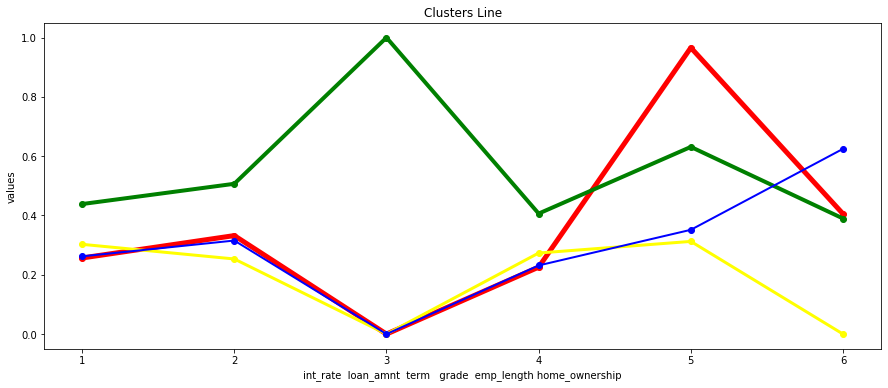

In [33]:
plt.figure(figsize=(15,6))
clu = kmodel.cluster_centers_  
x = [1,2,3,4,5,6]  
colors = ['red','green','yellow','blue']  
for i in range(4):  
   plt.plot(x,clu[i],label='clustre '+str(i),linewidth=5-i,color=colors[i],marker='o')   
plt.xlabel('int_rate  loan_amnt  term   grade  emp_length home_ownership')  
plt.ylabel('values')
plt.title('Clusters Line')
plt.show()

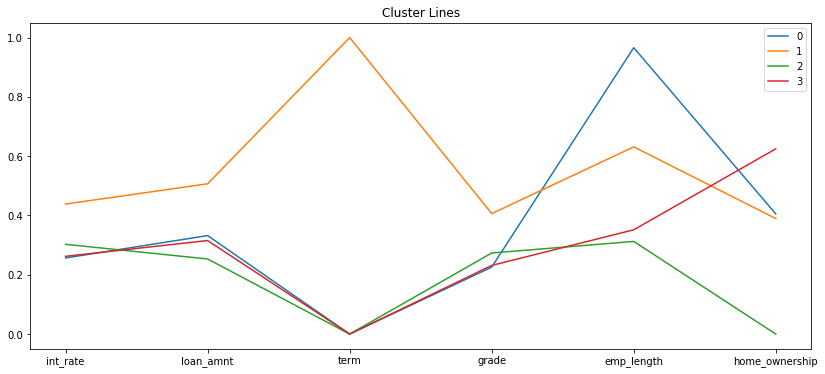

In [42]:
r.iloc[:,:-1].T.plot(figsize=(14,6),title=('Cluster Lines'))

Assuming we use loan grade as a proxy to credit rating 

Cluster 0: High interest rate, long period and high amount. Such products require users to have a long working life, 
           own houses, which can be mortgaged, and have a middle or higher credit rating;

Cluster 1: Average interest rate, small loan amount, short-term. This type of product requires a good credit rating 
           and does not have high requirements for working life and housing;

Cluster 2: Low interest rate, medium loan amount, short-term. Such products need a good credit rating, work for about 
           10 years, self-owned houses are mortgaged;

Cluster 3: Low interest rate, medium loan amount, short-term. Different from the customers targeted by Cluster 2, 
          this product requires a good credit rating, the working life requirement 
          is not high, and the self-owned house is mortgaged.